# Lab Assignment Seven 
### INFERENTIAL STATISTICS

<h4>Submission Instructions</h4>
<ol>
<li><h5>Save the file as <b>labAssignment7+lastname</b>. Kindly submit in the <b>.ipynb</b> format</h5></li>
<li><h5>Upload to Brightspace</h5></li>
</ol>
<h4>Dataset: Tips</h4>
<h4>Source: Seaborn library</h4>
<h4>example:</h4>
<blockquote>
    <code>tips = sns.load_dataset('tips')</code>
</blockquote>
<h4>Step One: Data Preparation (20 points)</h4>
<ol>
    <li>Import the libraries</li>
    <li>load the data into a dataframe as show above</li>
</ol>

In [3]:
#Step Solution goes here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import yfinance as yfin
import statsmodels.api as sm

tips = sns.load_dataset('tips')

print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


<h4>Step Two: Descriptive statistics (20 points) </h4>
<ol>
    <li>Use appropriate functions to compute the following:</li>
    <ul>
        <li>Mean</li>
        <li>Median</li>
        <li>Standard deviation</li>
    </ul>
    <li>Perform any other additional descriptive stats tasks</li>
</ol>

In [10]:
#Step Solution goes here
mean_tip = tips['tip'].mean()
median_tip = tips['tip'].median()
std_dev_tip = tips['tip'].std()
print("mean of the tips:",mean_tip)
print("median of the tips:",median_tip)
print("standard deviation of the tips:",std_dev_tip)
print(tips.describe())

mean of the tips: 2.99827868852459
median of the tips: 2.9
standard deviation of the tips: 1.3836381890011822
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


<h4>Step Three: Hypothesis testing (20 points)</h4>
<ol>
    <li>Perform a <b> two-sample t-test</b> to determine if the <b>average total_bill</b> differs for</li>
    <ul>
        <li>smokers</li>
        <li>non-smokers</li>
    </ul>
    <li>If we assume the mean of the tips to be 3.0, peform a <b>One-sample t-test </b> to decide whether it is accurate</li>
    <ul>
        <li><b>Null Hypothesis (H0): The mean tip is 3.0 </b></li>
        <li><b>Alternate Hypothesis (H1): The mean tip is not equal to 3.0 </b></li>
    </ul>
    <li>Follow the example we did in class to understand</li>
    <li>Kindly indicate what you infer from the t-statistic and p-values for:</li>
    <ul>
        <li><b>One-sample t-test</b></li>
        <li><b>Two-sample t-test</b></li>
    </ul>
</ol>

In [14]:
#Step Solution goes here
from scipy.stats import ttest_ind, ttest_1samp

smokers = tips[tips['smoker'] == 'Yes']['total_bill']
non_smokers = tips[tips['smoker'] == 'No']['total_bill']
t_stat_two, p_value_two = ttest_ind(smokers, non_smokers)

t_stat_one, p_value_one = ttest_1samp(tips['tip'], 3.0)

print("Two-sample t-test:", t_stat_two, p_value_two)
print("One-sample t-test:", t_stat_one, p_value_one)

Two-sample t-test: 1.338436383470007 0.18201032884302448
One-sample t-test: -0.019432641422916876 0.9845119176410544


<h4>Step Four: Confidence Interval (20 points)</h4>
<ol>
    <li>Write the code to find the standard_error</li>
    <li>Use the appropriate <b>scipy</b> function to determine the confidence interval</li>
    <li>Indicate what the confidence interval mean</li>
</ol>


In [17]:
#Step Solution goes here

from scipy.stats import sem, t

standard_error = sem(tips['tip'])

confidence = 0.95

mean_tip = tips['tip'].mean()
df = len(tips['tip']) - 1

critical_value = t.ppf((1 + confidence) / 2, df)

margin_of_error = critical_value * standard_error
confidence_interval = (mean_tip - margin_of_error, mean_tip + margin_of_error)

print("Standard Error:", standard_error)
print("95% Confidence Interval:", confidence_interval)

Standard Error: 0.088578358337857
95% Confidence Interval: (2.8237993062818205, 3.172758070767359)


<h4>Step Five: Visualization (20 points)</h4>
<ol>
    <li>Perform the following visualizations</li>
    <ul>
        <li>The distribution of total_bill for smokers and non-smokers</li>
        <li>A histogram of tips</li>
        <li>A distribution of tips across the time of the meal</li>
    </ul>
</ol>

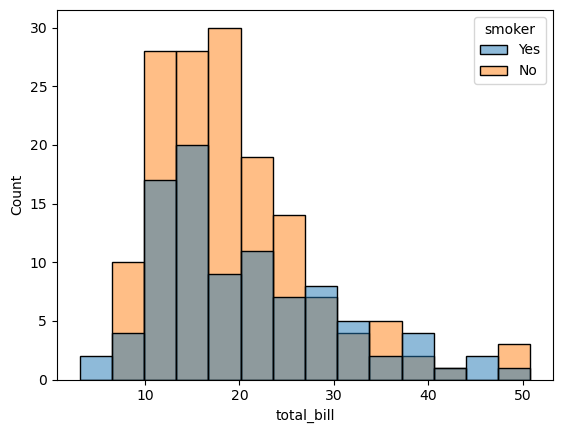

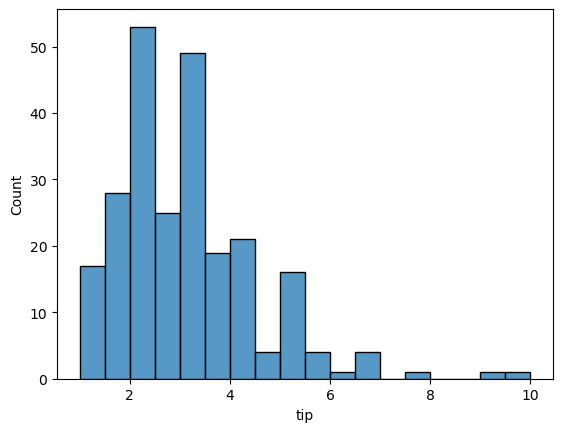

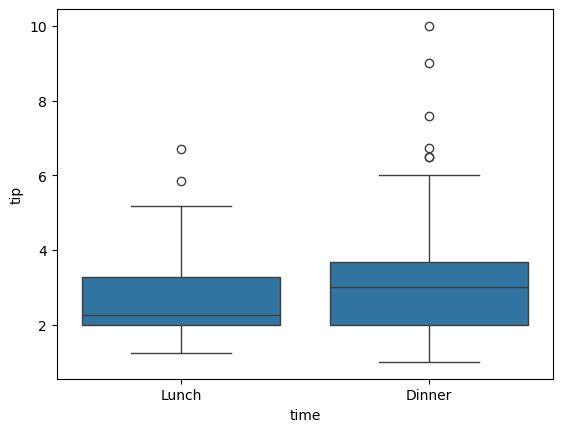

In [19]:
#step Solution goes here

sns.histplot(data=tips, x='total_bill', hue='smoker')
plt.show()

sns.histplot(data=tips, x='tip')
plt.show()

sns.boxplot(data=tips, x='time', y='tip')
plt.show()
